# Sentiment Analysis Using IMDB data

### Importing all Libraries

In [1]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten,LSTM, GRU
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
import seaborn as sns
from matplotlib import pyplot as plt

### Importing IMDB dataset

In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
len(data.sentiment)

50000

### Preprocess Import data

In [4]:
def remove_tags(string):
    removelist = ""
    clean = re.compile('<.*?>')
    result = re.sub(clean, '', string)
    result = re.sub('https://.*','',result)
    result = re.sub(r'\W+', ' ', result)
    result = result.lower()
    return result                   

In [5]:
data['review']=data['review'].apply(lambda cw : remove_tags(cw))
data['review'].head(20)

0     one of the other reviewers has mentioned that ...
1     a wonderful little production the filming tech...
2     i thought this was a wonderful way to spend ti...
3     basically there s a family where a little boy ...
4     petter mattei s love in the time of money is a...
5     probably my all time favorite movie a story of...
6     i sure would like to see a resurrection of a u...
7     this show was an amazing fresh innovative idea...
8     encouraged by the positive comments about this...
9     if you like original gut wrenching laughter yo...
10    phil the alien is one of those quirky films wh...
11    i saw this movie when i was about 12 when it c...
12    so im not a big fan of boll s work but then ag...
13    the cast played shakespeare shakespeare lost i...
14    this a fantastic movie of three prisoners who ...
15    kind of drawn in by the erotic scenes only to ...
16    some films just simply should not be remade th...
17    this movie made it into one of my top 10 m

In [6]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [7]:
Mood = data['sentiment'].value_counts()


Text(0.5, 1.0, 'Mood Distribution')

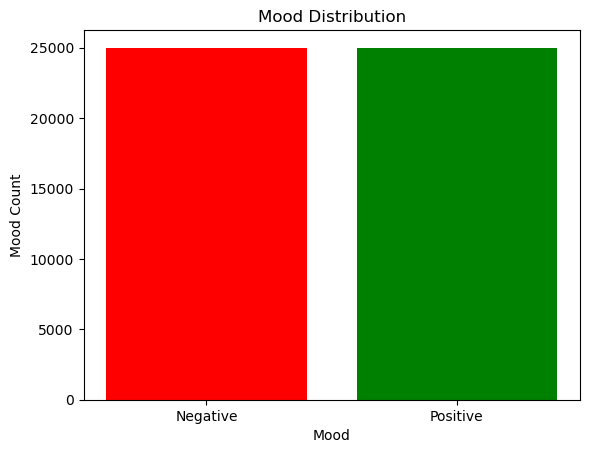

In [8]:
index = [0,1]
plt.bar(index,Mood,color=['r','g'])
plt.xticks(index,['Negative','Positive'])
plt.xlabel('Mood')
plt.ylabel('Mood Count')
plt.title('Mood Distribution')

### Converting Sentiment data into Binary

In [9]:
train_df = data[['review', 'sentiment']]
train_df.loc[:,'Sentiment'] = train_df.sentiment.map({'negative':0,'positive':1})
train_df = train_df.drop(['sentiment'], axis=1)
train_df.head()

,review,Sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is a...,1


In [10]:
Y =train_df['Sentiment']
Y.shape

(50000,)

### Indexing review data using Keras Tokenizer function

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['review'])
len(tokenizer.word_index)

103893

In [12]:
X = tokenizer.texts_to_sequences(train_df['review'])

In [13]:
lengths = [len(seq) for seq in X]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 2498


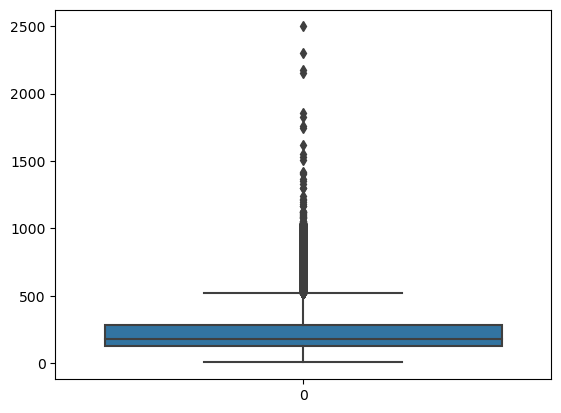

In [14]:
sns.boxplot(lengths)
plt.show()

In [15]:
MAX_SEQ_LENGTH = 2498
X_padded = pad_sequences(X, maxlen=MAX_SEQ_LENGTH, padding="pre")

In [16]:
print(X_padded[0], "\n"*3)

[   0    0    0 ...  126 4113  485] 





In [17]:
len(X_padded[0])

2498

### Spliting Complete data into 70:30 ratio

In [18]:
TEST_SIZE = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=TEST_SIZE, random_state=4)

In [19]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (35000, 2498)
Shape of output sequences: (35000,)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (15000, 2498)
Shape of output sequences: (15000,)


### Simple RNN model Initialized

In [20]:
model = Sequential()
model.add(Embedding(103894, 32,input_length=2498))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2498, 32)          3324608   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,326,721
Trainable params: 3,326,721
Non-trainable params: 0
_________________________________________________________________


### Choosing Binary_crossentrophy for Binary Classification

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, Y_train,epochs=5,validation_data=(X_test,Y_test))

Epoch 1/5


2024-01-02 11:45:26.832197: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1094/1094 [==============================] - 315s 287ms/step - loss: 0.5237 - acc: 0.7330 - val_loss: 0.4367 - val_acc: 0.7975
Epoch 2/5
1094/1094 [==============================] - 319s 292ms/step - loss: 0.3316 - acc: 0.8581 - val_loss: 0.5921 - val_acc: 0.6815
Epoch 3/5
1094/1094 [==============================] - 563s 515ms/step - loss: 0.4060 - acc: 0.8241 - val_loss: 0.4268 - val_acc: 0.8219
Epoch 4/5
1094/1094 [==============================] - 586s 536ms/step - loss: 0.2606 - acc: 0.8973 - val_loss: 0.4569 - val_acc: 0.8098
Epoch 5/5
1094/1094 [==============================] - 312s 285ms/step - loss: 0.1888 - acc: 0.9301 - val_loss: 0.4181 - val_acc: 0.8330


### Testing Model with Random Data , Simple RNN does not perform as per expectations.

In [22]:
sample = ['movie screening going well']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=2498, padding="pre")
print(sample)
sentiment_status = model.predict(sample)
status = "positive" if sentiment_status > 0.5 else "negative"
print(f'Predicted sentiment is {status} with a probability of {sentiment_status}')

[[   0    0    0 ... 2696  168   69]]
1/1 [==============================] - 0s 76ms/step
Predicted sentiment is negative with a probability of [[0.01603991]]


### LTSM model Initialized

In [23]:
lstm_model = Sequential()
lstm_model.add(Embedding(103894, 100,input_length=2498))
lstm_model.add(LSTM(150, return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

2024-01-02 12:20:21.478139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 12:20:21.478640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 12:20:21.479088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [24]:
lstm_model.compile(loss      =  'binary_crossentropy',
                   optimizer =  'adam',
                   metrics   =  ['acc'])

In [25]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2498, 100)         10389400  
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 10,540,151
Trainable params: 10,540,151
Non-trainable params: 0
_________________________________________________________________


In [26]:
lstm_model.fit(X_train, Y_train,epochs=5,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/5


2024-01-02 12:20:21.577761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 12:20:21.578312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 12:20:21.578959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

274/274 [==============================] - ETA: 0s - loss: 0.4313 - acc: 0.7984

2024-01-02 12:40:59.843255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 12:40:59.843980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 12:40:59.844422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

274/274 [==============================] - 1450s 5s/step - loss: 0.4313 - acc: 0.7984 - val_loss: 0.3302 - val_acc: 0.8672
Epoch 2/5
274/274 [==============================] - 1504s 5s/step - loss: 0.1984 - acc: 0.9266 - val_loss: 0.3173 - val_acc: 0.8798
Epoch 3/5
274/274 [==============================] - 1509s 6s/step - loss: 0.1243 - acc: 0.9571 - val_loss: 0.3442 - val_acc: 0.8797
Epoch 4/5
274/274 [==============================] - 4012s 15s/step - loss: 0.0745 - acc: 0.9762 - val_loss: 0.3669 - val_acc: 0.8807
Epoch 5/5
274/274 [==============================] - 2813s 10s/step - loss: 0.0487 - acc: 0.9851 - val_loss: 0.4098 - val_acc: 0.8822


### Testing Model with Random Data , LSTM perform as per expectations.

In [40]:
sample = ['movie script was awesome, the way it was redirected surprising element carry forward till end']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=2498, padding="pre")
print(sample)
sentiment_lstm_status = lstm_model.predict(sample)
status = "positive" if sentiment_lstm_status > 0.5 else "negative"
print(f'Predicted sentiment is {status} with a probability of {sentiment_lstm_status}')

[[   0    0    0 ...  918 2327  128]]
1/1 [==============================] - 0s 78ms/step
Predicted sentiment is positive with a probability of [[0.8968952]]


In [41]:
sample = ['movie was hype , there were few actions and story was so predictable']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=2498, padding="pre")
print(sample)
sentiment_lstm_status = lstm_model.predict(sample)
status = "positive" if sentiment_lstm_status > 0.5 else "negative"
print(f'Predicted sentiment is {status} with a probability of {sentiment_lstm_status}')

[[  0   0   0 ...  13  36 712]]
1/1 [==============================] - 0s 76ms/step
Predicted sentiment is negative with a probability of [[0.01282312]]


### GRU model Initialized

In [28]:
gru_model = Sequential()
gru_model.add(Embedding(103894, 100,input_length=2498))
gru_model.add(GRU(150, return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))

2024-01-02 15:28:29.478918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 15:28:29.479495: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 15:28:29.479940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [29]:
gru_model.compile(loss      =  'binary_crossentropy',
                   optimizer =  'adam',
                   metrics   =  ['acc'])

In [30]:
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2498, 100)         10389400  
                                                                 
 gru (GRU)                   (None, 150)               113400    
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 10,502,951
Trainable params: 10,502,951
Non-trainable params: 0
_________________________________________________________________


In [31]:
gru_model.fit(X_train, Y_train,epochs=5,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/5


2024-01-02 15:28:29.569602: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 15:28:29.570193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 15:28:29.570626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

274/274 [==============================] - ETA: 0s - loss: 0.4280 - acc: 0.7944

2024-01-02 15:47:53.280508: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-02 15:47:53.281097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-02 15:47:53.281882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

274/274 [==============================] - 1320s 5s/step - loss: 0.4280 - acc: 0.7944 - val_loss: 0.3035 - val_acc: 0.8760
Epoch 2/5
274/274 [==============================] - 4007s 15s/step - loss: 0.1962 - acc: 0.9261 - val_loss: 0.3096 - val_acc: 0.8837
Epoch 3/5
274/274 [==============================] - 2293s 8s/step - loss: 0.1082 - acc: 0.9628 - val_loss: 0.3318 - val_acc: 0.8695
Epoch 4/5
274/274 [==============================] - 2055s 8s/step - loss: 0.0566 - acc: 0.9814 - val_loss: 0.3621 - val_acc: 0.8865
Epoch 5/5
274/274 [==============================] - 4037s 15s/step - loss: 0.0347 - acc: 0.9889 - val_loss: 0.4428 - val_acc: 0.8767


### Testing Model with Random Data , GRU does not perform as per expectations.

In [38]:
sample = ['i dont like this movie']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=2498, padding="pre")
print(sample)
sentiment_gru_status = gru_model.predict(sample)
status = "positive" if sentiment_gru_status > 0.5 else "negative"
print(f'Predicted sentiment is {status} with a probability of {sentiment_gru_status}')

[[ 0  0  0 ... 38 10 15]]
1/1 [==============================] - 0s 74ms/step
Predicted sentiment is negative with a probability of [[0.44253373]]


In [39]:
sample = ['movie script was awesome, the way it was redirected surprising element carry forward till end']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=2498, padding="pre")
print(sample)
sentiment_gru_status = gru_model.predict(sample)
status = "positive" if sentiment_gru_status > 0.5 else "negative"
print(f'Predicted sentiment is {status} with a probability of {sentiment_gru_status}')

[[   0    0    0 ...  918 2327  128]]
1/1 [==============================] - 0s 71ms/step
Predicted sentiment is negative with a probability of [[0.30525056]]
